## Dog breeds

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogbreed/"
sz=224
arch=resnext101_64
bs=58

In [3]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [5]:
label_df = pd.read_csv(label_csv)

In [6]:
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False) #how many dogs each breed has

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [9]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test', 
                                      val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
#learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

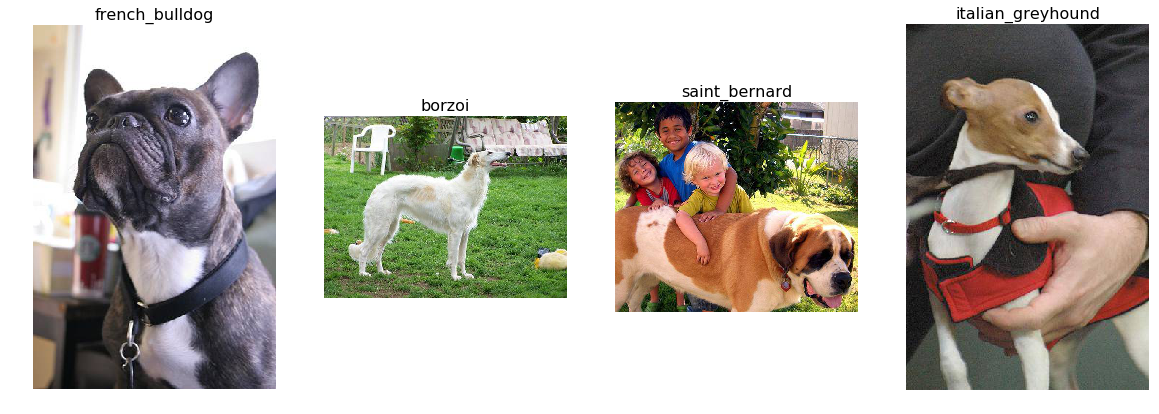

In [10]:
ks = [random.randint(0, len(data.trn_ds)) for i in range(4)]
fns = [PATH + data.trn_ds.fnames[x] for x in ks]
labs = [data.classes[data.trn_y[x]] for x in ks]
plots_from_files(fns, titles=labs, figsize=(20, 10))

In [11]:
k = random.randint(0, len(data.trn_ds))
img = PIL.Image.open(PATH + data.trn_ds.fnames[k])
img.size

(500, 375)

In [12]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

row_sz, col_sz = list(zip(*size_d.values()))

row_sz = np.array(row_sz); col_sz = np.array(col_sz)

row_sz[:5]

array([500, 500, 500, 500, 500])

(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

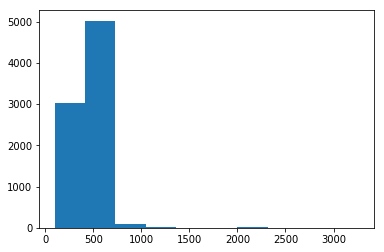

In [13]:
plt.hist(row_sz)

(array([ 135.,  592., 1347., 1164., 4599.,  128.,   76.,   62.,   14.,   11.]),
 array([ 97. , 185.5, 274. , 362.5, 451. , 539.5, 628. , 716.5, 805. , 893.5, 982. ]),
 <a list of 10 Patch objects>)

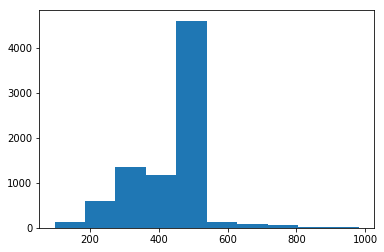

In [14]:
plt.hist(row_sz[row_sz<1000])

In [15]:
len(data.trn_ds), len(data.test_ds)

(8178, 10357)

In [16]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

In [17]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test', 
                                          val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs, num_workers=4)
    return data if sz > 300 else data.resize(340, 'tmp')

In [18]:
data = get_data(sz, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [19]:
PATHTMP = 'data/dogbreed/tmp/340/'

(array([2898.,  553., 3059., 1511.,   85.,   38.,   19.,    8.,    4.,    3.]),
 array([340. , 389.2, 438.4, 487.6, 536.8, 586. , 635.2, 684.4, 733.6, 782.8, 832. ]),
 <a list of 10 Patch objects>)

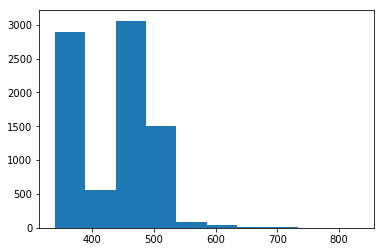

In [20]:
size_d = {k: PIL.Image.open(PATHTMP + k).size for k in data.trn_ds.fnames}

row_sz, col_sz = list(zip(*size_d.values()))

row_sz = np.array(row_sz); col_sz = np.array(col_sz)

plt.hist(row_sz)

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [22]:
learn.fit(1e-2, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.957652   0.401134   0.907088  
    1      0.440956   0.361796   0.911877                    
    2      0.308322   0.331477   0.913314                    
    3      0.251868   0.322517   0.917625                    
    4      0.198599   0.330295   0.915709                    



[0.33029455, 0.9157088150580724]

In [23]:
learn.precompute=False
learn.fit(1e-2, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.267783   0.239522   0.924808  
    1      0.234626   0.240233   0.923851                    
    2      0.219842   0.234693   0.92864                     
    3      0.212436   0.236096   0.925287                    
    4      0.195906   0.234433   0.927203                    



[0.23443334, 0.9272030707862642]

In [24]:
learn.save('224_pre') #what does it save?

In [25]:
learn.load('224_pre')

In [146]:
learn.set_data(get_data(299, bs))
learn.freeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [147]:
learn.fit(1e-2, 1, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.214389   0.233339   0.923372  
    1      0.185339   0.225847   0.926724                    
    2      0.174324   0.222926   0.927203                    



[0.22292563, 0.927203067474895]

In [26]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), axis=0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9310176125244618, 0.23835852757680873)

In [27]:
log_preds, y = learn.TTA(is_test=True)

AttributeError: module 'numpy' has no attribute 'exmp'

In [28]:
probs = np.mean(np.exp(log_preds), axis=0)

In [30]:
probs.shape

(10357, 120)

In [31]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [33]:
df.insert(0, 'id', [s[5:-4] for s in data.test_ds.fnames])

In [35]:
os.makedirs(PATH+'subm/', exist_ok=True)

In [37]:
df.to_csv(PATH+'subm/submit.csv', index=False)

In [38]:
from io import StringIO

In [39]:
StringIO?